<a href="https://colab.research.google.com/github/JaskiratSingh10/CS503/blob/main/2023EEB1212_Lab_8%2C9%2C10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
from torch.optim import Adam


link to the dataset : https://drive.google.com/drive/folders/165tGbhZSnTUj3IvZr_WhrOx4bkkwU7ex
to be uploaded on your google drive.

Loading the Dataset


In [ ]:
train_path = r'/content/drive/MyDrive/Project'
if not os.path.exists(train_path):
    print("Path does not exist:", train_path)
else:
    print("Path found, contents:", os.listdir(train_path))


Path found, contents: ['Train', 'Test']


In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to a common size
    transforms.ToTensor()           # Convert images to tensors
])

In [ ]:
train_path='/content/drive/MyDrive/Project/Train'
test_path='/content/drive/MyDrive/Project/Test'

train_dataset = datasets.ImageFolder(root=train_path, transform=transform)
test_dataset = datasets.ImageFolder(root=test_path, transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=1, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=1, shuffle=False)

device="cuda" if torch.cuda.is_available() else "cpu"
print(device)


cuda


In [ ]:
import glob

#calculating the size of training and testing images
train_count=len(glob.glob(train_path+'/**/*.jpg'))
test_count=len(glob.glob(test_path+'/**/*.jpg'))

print(train_count,test_count)

108 4


Now our dataset is ready, but first let us see what it looks like and plot the images.


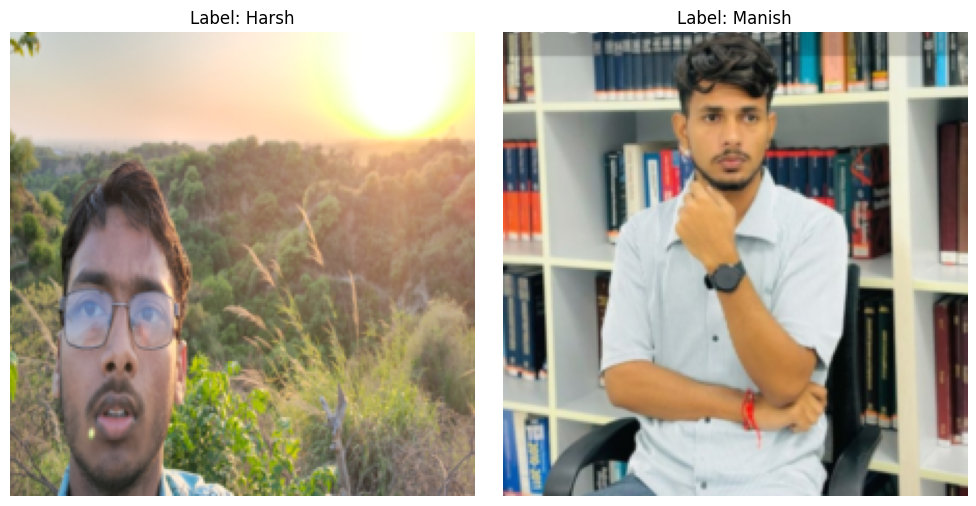

In [ ]:
# Assuming 'class_names' dictionary as mentioned in your question
class_names = {0: 'Harsh', 1: 'Manish'}

# Access specific images directly from the dataset
indices_to_display = [0, 59]  # 1st and 60th images (index 0 and index 59)

# Set up a single row of subplots
fig, axes = plt.subplots(1, len(indices_to_display), figsize=(10, 5))

# Display images
for i, idx in enumerate(indices_to_display):
    # Get the specific image and label
    image, label = train_loader.dataset[idx]

    # Convert image to numpy array for display
    npimg = image.numpy()

    # Display the image on the subplot
    axes[i].imshow(np.transpose(npimg, (1, 2, 0)))  # Rearrange dimensions for displaying
    axes[i].set_title(f"Label: {class_names[label]}")
    axes[i].axis('off')  # Hide axes for a cleaner look

# Show all images in a row
plt.tight_layout()
plt.show()

**CNN** **Implementation**

In [ ]:
class ConvNet(nn.Module):
  def __init__(self,num_classes=2):
    super(ConvNet,self).__init__()
    #input shape =(1,3,224,224)
    self.conv1=nn.Conv2d(in_channels=3,out_channels=12,kernel_size=3,stride=1,padding=1)
    #shape=(1,12,224,224)
    self.bn1=nn.BatchNorm2d(num_features=12)
    #shape=(1,12,224,224)
    self.relu1=nn.ReLU()
    #shape=(1,12,224,224)
    self.pool=nn.MaxPool2d(kernel_size=2)
    #shape=(1,12,112,112)
    self.conv2=nn.Conv2d(in_channels=12,out_channels=20,kernel_size=3,stride=1,padding=1)
    #shape=(1,20,112,112)
    self.relu2=nn.ReLU()
    #shape=(1,20,112,112)
    self.conv3=nn.Conv2d(in_channels=20,out_channels=32,kernel_size=3,stride=1,padding=1)
    #shape=(1,32,112,112)
    self.bn3=nn.BatchNorm2d(num_features=32)
    self.relu3=nn.ReLU()
    #shape=(1,32,112,112)
    self.fc=nn.Linear(in_features=32*112*112,out_features=num_classes)
    #shape=(1,2)
  #Forward Pass
  def forward(self,input):
    output=self.conv1(input)
    output=self.bn1(output)
    output=self.relu1(output)
    output=self.pool(output)
    output=self.conv2(output)
    output=self.relu2(output)
    output=self.conv3(output)
    output=self.relu3(output)
    output=output.view(-1,32*112*112)
    output=self.fc(output)
    return output

In [ ]:
model=ConvNet(num_classes=2).to(device)

In [ ]:
#optimizer and loss function
optimizer=Adam(model.parameters(),lr=0.001,weight_decay=0.0001)
loss_function=nn.CrossEntropyLoss()

In [ ]:
num_epochs=15

CNN Architecture

In [ ]:
from torchsummary import summary
summary(model, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 12, 224, 224]             336
       BatchNorm2d-2         [-1, 12, 224, 224]              24
              ReLU-3         [-1, 12, 224, 224]               0
         MaxPool2d-4         [-1, 12, 112, 112]               0
            Conv2d-5         [-1, 20, 112, 112]           2,180
              ReLU-6         [-1, 20, 112, 112]               0
            Conv2d-7         [-1, 32, 112, 112]           5,792
              ReLU-8         [-1, 32, 112, 112]               0
            Linear-9                    [-1, 2]         802,818
Total params: 811,150
Trainable params: 811,150
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.57
Forward/backward pass size (MB): 24.88
Params size (MB): 3.09
Estimated Total Size (MB): 28.55
-----------------------------------------

**Training and Testing**

Epoch: 1 Train Loss: tensor(0.2840) Train Accuracy: 0.8611111111111112 Test Accuracy: 0.75
Epoch: 3 Train Loss: tensor(0.0025) Train Accuracy: 1.0092592592592593 Test Accuracy: 0.75
Epoch: 5 Train Loss: tensor(0.0002) Train Accuracy: 1.0092592592592593 Test Accuracy: 1.0
Epoch: 7 Train Loss: tensor(0.0001) Train Accuracy: 1.0092592592592593 Test Accuracy: 0.75
Epoch: 9 Train Loss: tensor(7.7635e-05) Train Accuracy: 1.0092592592592593 Test Accuracy: 1.0
Epoch: 11 Train Loss: tensor(6.2342e-05) Train Accuracy: 1.0092592592592593 Test Accuracy: 1.0
Epoch: 13 Train Loss: tensor(5.3886e-05) Train Accuracy: 1.0092592592592593 Test Accuracy: 1.0


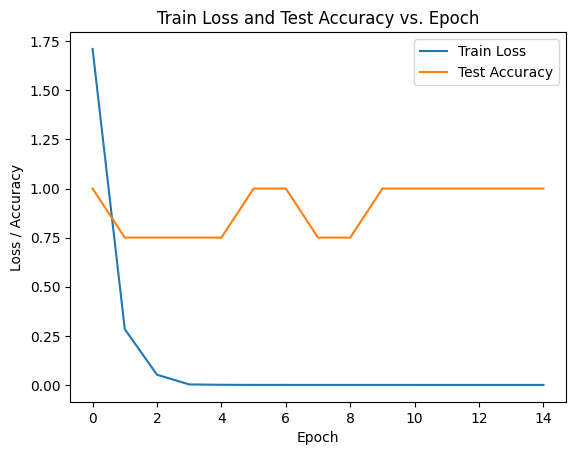

In [ ]:
'''creating lists to store loss and accuracy for plotting graph'''
train_losses = []
train_accuracies = []
test_accuracies = []
#Training Loop
best_accuracy=0.0
for epoch in range(num_epochs):
  model.train()
  train_accuracy=0.0
  train_loss=0.0

  for i,(images,labels) in enumerate(train_loader):
    '''These lines transfer the images and labels tensors to the GPU if a GPU is available.'''
    if torch.cuda.is_available():
      images=images.cuda()
      labels=labels.cuda()

    optimizer.zero_grad()
    outputs=model(images)
    loss=loss_function(outputs,labels)
    loss.backward()
    optimizer.step()

    train_loss+=loss.cpu().data*images.size(0) #It moves the loss value back to the CPU (loss.cpu().data) and multiplies it by the number of images in the batch (images.size(0)) to account for the batch size.
    _,prediction=torch.max(outputs.data,1) #calculates the training accuracy by comparing the predicted labels (prediction) to the true labels
    train_accuracy+=int(torch.sum(prediction==labels.data))
  train_accuracy=train_accuracy/train_count #averaging
  train_loss=train_loss/train_count
  train_losses.append(train_loss.item())  # Store train loss
  train_accuracies.append(train_accuracy) # Store train accuracy

  #evaulation on testing dataset
  model.eval()
  test_accuracy=0.0
  for i,(images,labels) in enumerate(test_loader):
    if torch.cuda.is_available():
      images=(images.cuda())
      labels=(labels.cuda())

    outputs=model(images)
    _,prediction=torch.max(outputs.data,1)
    test_accuracy+=int(torch.sum(prediction==labels.data))
  test_accuracy=test_accuracy/test_count
  test_accuracies.append(test_accuracy) # Store test accuracy



  if (epoch + 1) % 2 == 0:
    print('Epoch: '+str(epoch)+' Train Loss: '+str(train_loss)+' Train Accuracy: '+str(train_accuracy)+' Test Accuracy: '+str(test_accuracy))

plt.plot(range(num_epochs), train_losses, label='Train Loss')
plt.plot(range(num_epochs), test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss / Accuracy')
plt.title('Train Loss and Test Accuracy vs. Epoch')
plt.legend()
plt.show()




How Our model performed:

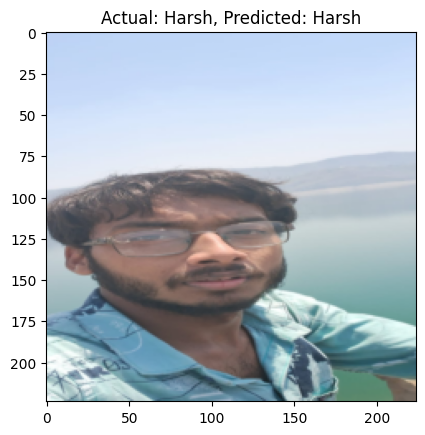

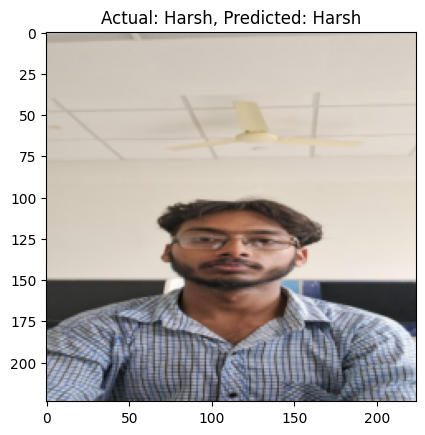

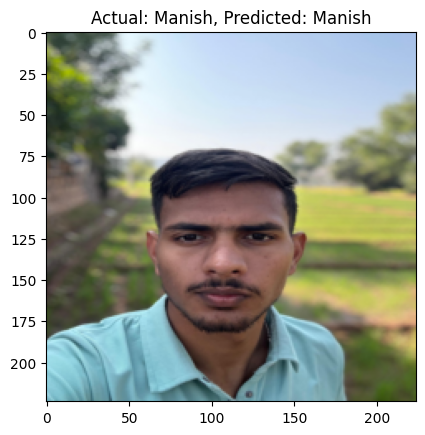

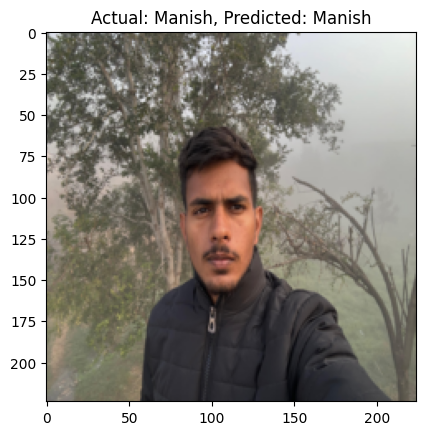

In [ ]:
model.eval()
class_names = {0: 'Harsh', 1: 'Manish'}

with torch.no_grad():
    for images, labels in test_loader:
        if torch.cuda.is_available():
            images = images.cuda()
            labels = labels.cuda()

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        # Get the image and label
        image = images[0].cpu().permute(1, 2, 0)  # Permute to (H, W, C)
        label = labels[0].item()
        predicted_label = predicted[0].item()

        # Get the class names from the dictionary
        actual_class_name = class_names[label]
        predicted_class_name = class_names[predicted_label]

        # Display the image and prediction with class names
        plt.imshow(image)
        plt.title(f"Actual: {actual_class_name}, Predicted: {predicted_class_name}")
        plt.show()